In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score

In [3]:
# Feature scaling (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Tune eps based on your dataset
y_dbscan = dbscan.fit_predict(X_scaled)

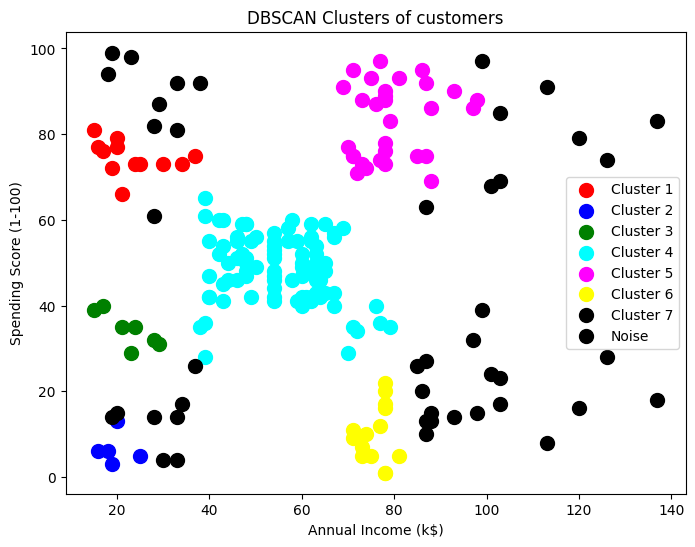

In [5]:
# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
unique_labels = set(y_dbscan)
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black']

for k in unique_labels:
    if k == -1:
        # Noise points
        col = 'black'
        label = 'Noise'
    else:
        col = colors[k % len(colors)]
        label = f"Cluster {k+1}"
    plt.scatter(
        X[y_dbscan == k, 0], X[y_dbscan == k, 1],
        s=100, c=col, label=label
    )

plt.title('DBSCAN Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()